# Iris Flower Classification

## Task 3: 

### About the data
#### Context 
The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

This dataset became a typical test case for many statistical classification techniques in machine learning such as support vector machines.
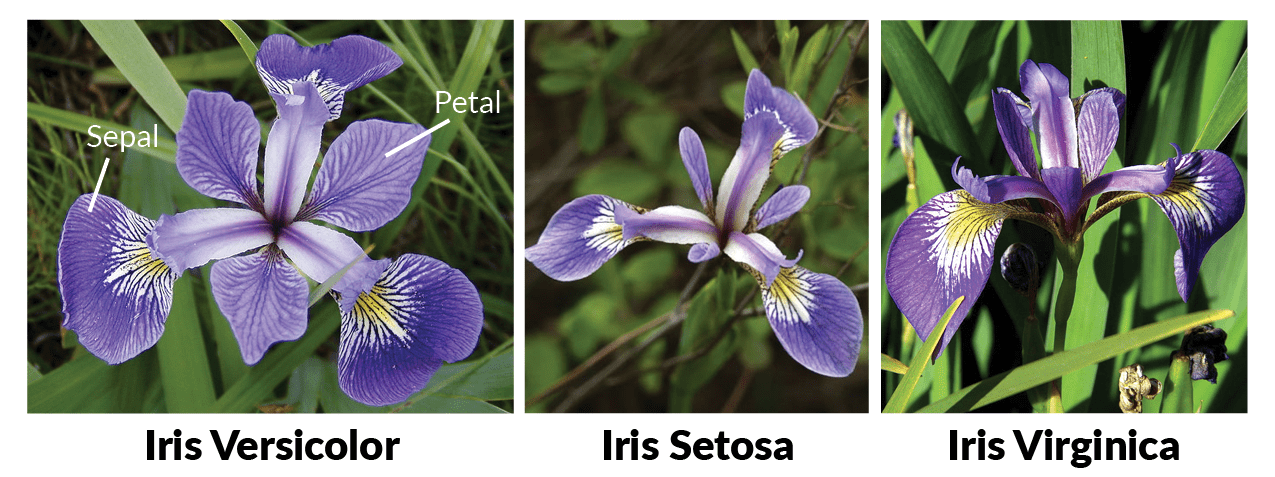
[Image Source](http://www.lac.inpe.br/~rafael.santos/Docs/CAP394/WholeStory-Iris.html)

#### Dataset Content
The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).

## Import modules

In [1]:
# required modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# from lazypredict.Supervised import LazyClassifier

# modules to model data
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Modules to check accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import sklearn.metrics as metrics

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Load data

In [2]:
iris = pd.read_csv('C:/Users/admin/Desktop/xyz/Jupyter Notebook/data/IRIS.csv')
print('The shape of the dataframe is',iris.shape)
iris.head()

The shape of the dataframe is (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Inspect Data

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

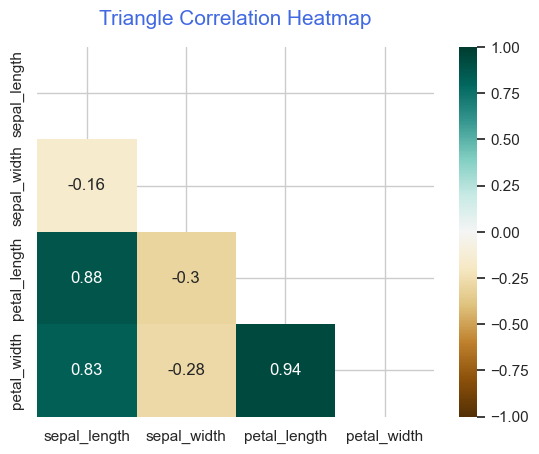

In [4]:
sns.set_theme(context='notebook', style='whitegrid', 
                  palette='deep', font='sans-serif', 
                  font_scale=1, color_codes=True, rc=None)

mask = np.triu(np.ones_like(iris.corr(method = "spearman") , dtype = bool))
heatmap = sns.heatmap(iris.corr(method = "spearman") , 
                      mask = mask , vmin = -1 , vmax = 1 ,
                      annot = True , cmap="BrBG")
heatmap.set_title("Triangle Correlation Heatmap" , 
                  fontdict = {'fontsize': 15, 'color':'royalblue'} , pad =16 )

In [5]:
#Frequency distribution of species"
iris_outcome = pd.crosstab(index=iris["species"],   # Make a crosstab
                              columns="count")      # Name the count column

iris_outcome

col_0,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [6]:
iris_setosa=iris.loc[iris["species"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["species"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["species"]=="Iris-versicolor"]

#### Distribution plot

plot each flower to a different histogram

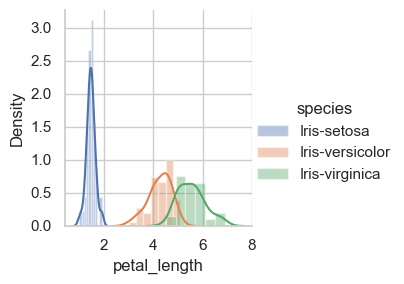

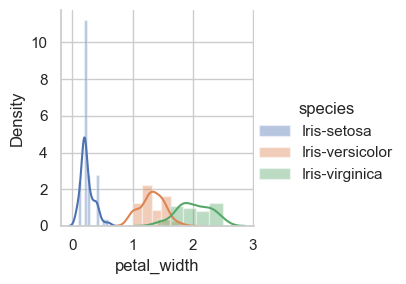

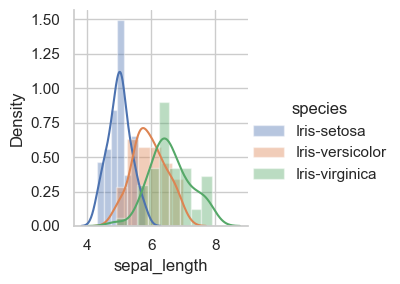

In [7]:
sns.FacetGrid(iris,hue="species").map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(iris,hue="species").map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(iris,hue="species").map(sns.distplot,"sepal_length").add_legend()

plt.show()

#### Box Plot

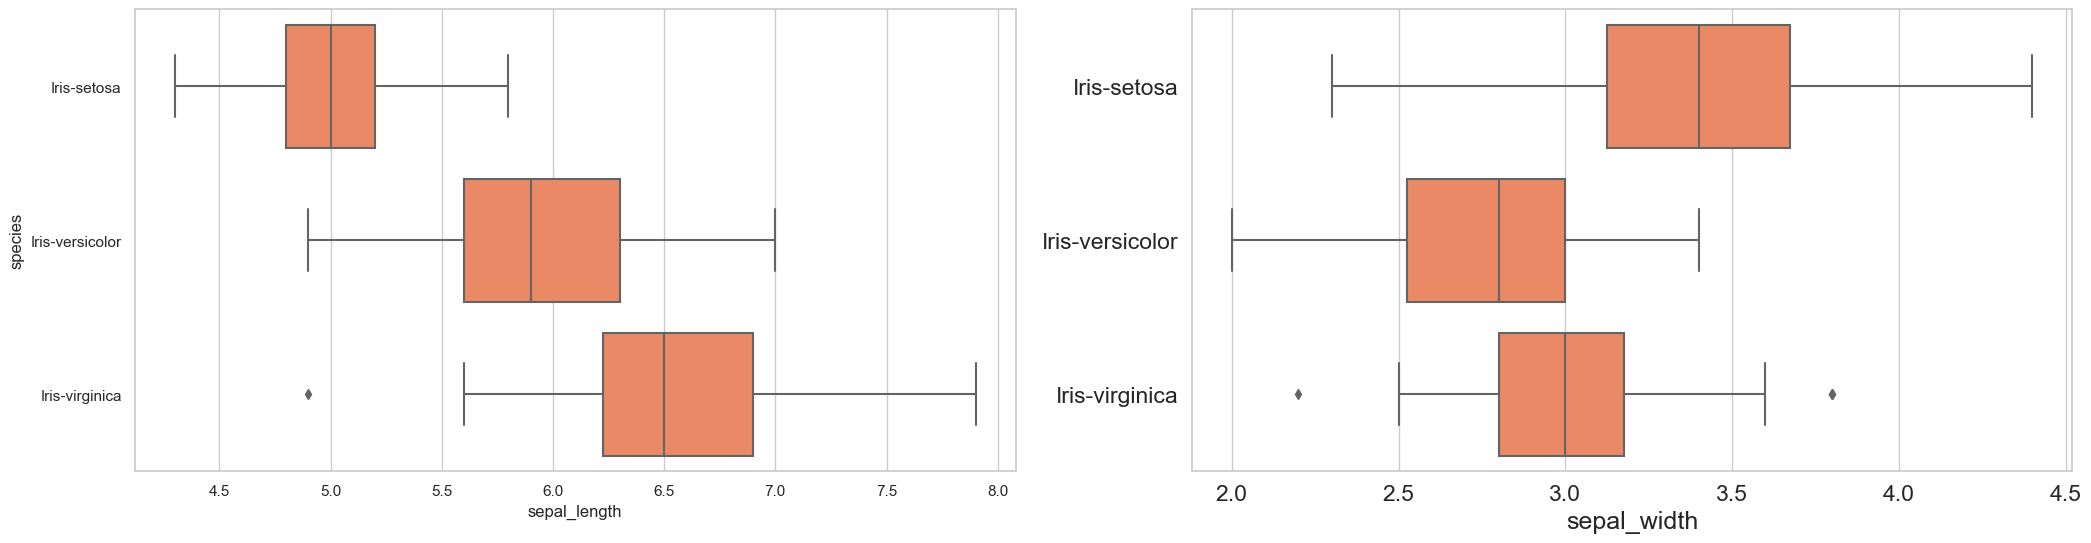

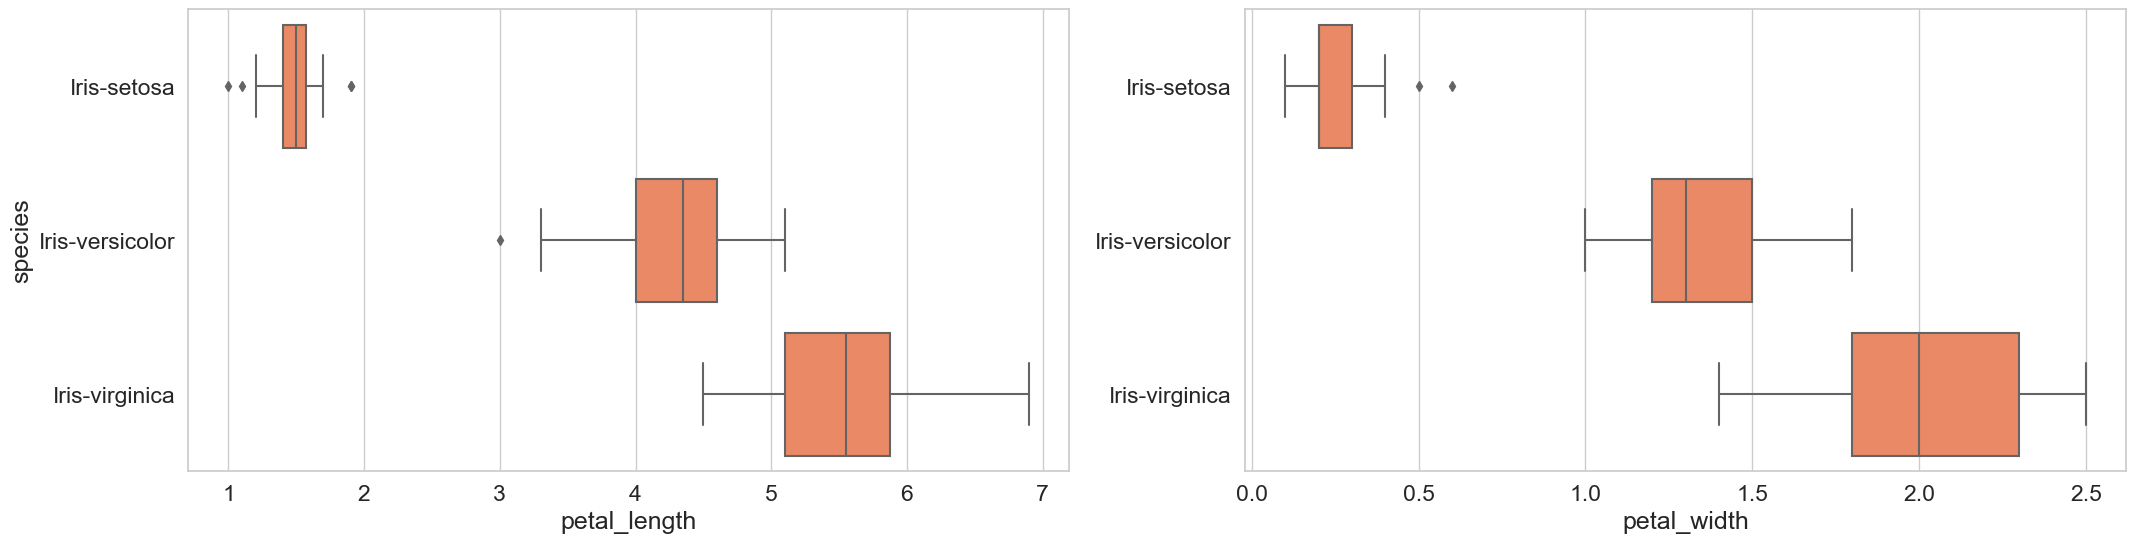

In [8]:
Num = ['sepal_length' , 'sepal_width' , 'petal_length' , 'petal_width']

j = 0
while j < 5:
    sns.set_style('whitegrid')
    fig = plt.figure (figsize = [25 , 6])
    plt.subplot(1, 2, 1)
    sns.boxplot (x = Num[j], y="species" , data = iris , color='coral')
    sns.set(font_scale=1.5)
    j += 1
    
    sns.set_style('whitegrid')
    plt.subplot(1, 2, 2)
    sns.boxplot (x = Num[j] ,y="species", data = iris , color='coral')
    plt.ylabel('')
    sns.set(font_scale=1.5)
    j += 1
    if j == 4:
        break
    plt.show()

All the three species have a clearly distinct media sepal lengths.

#### Scatter plot


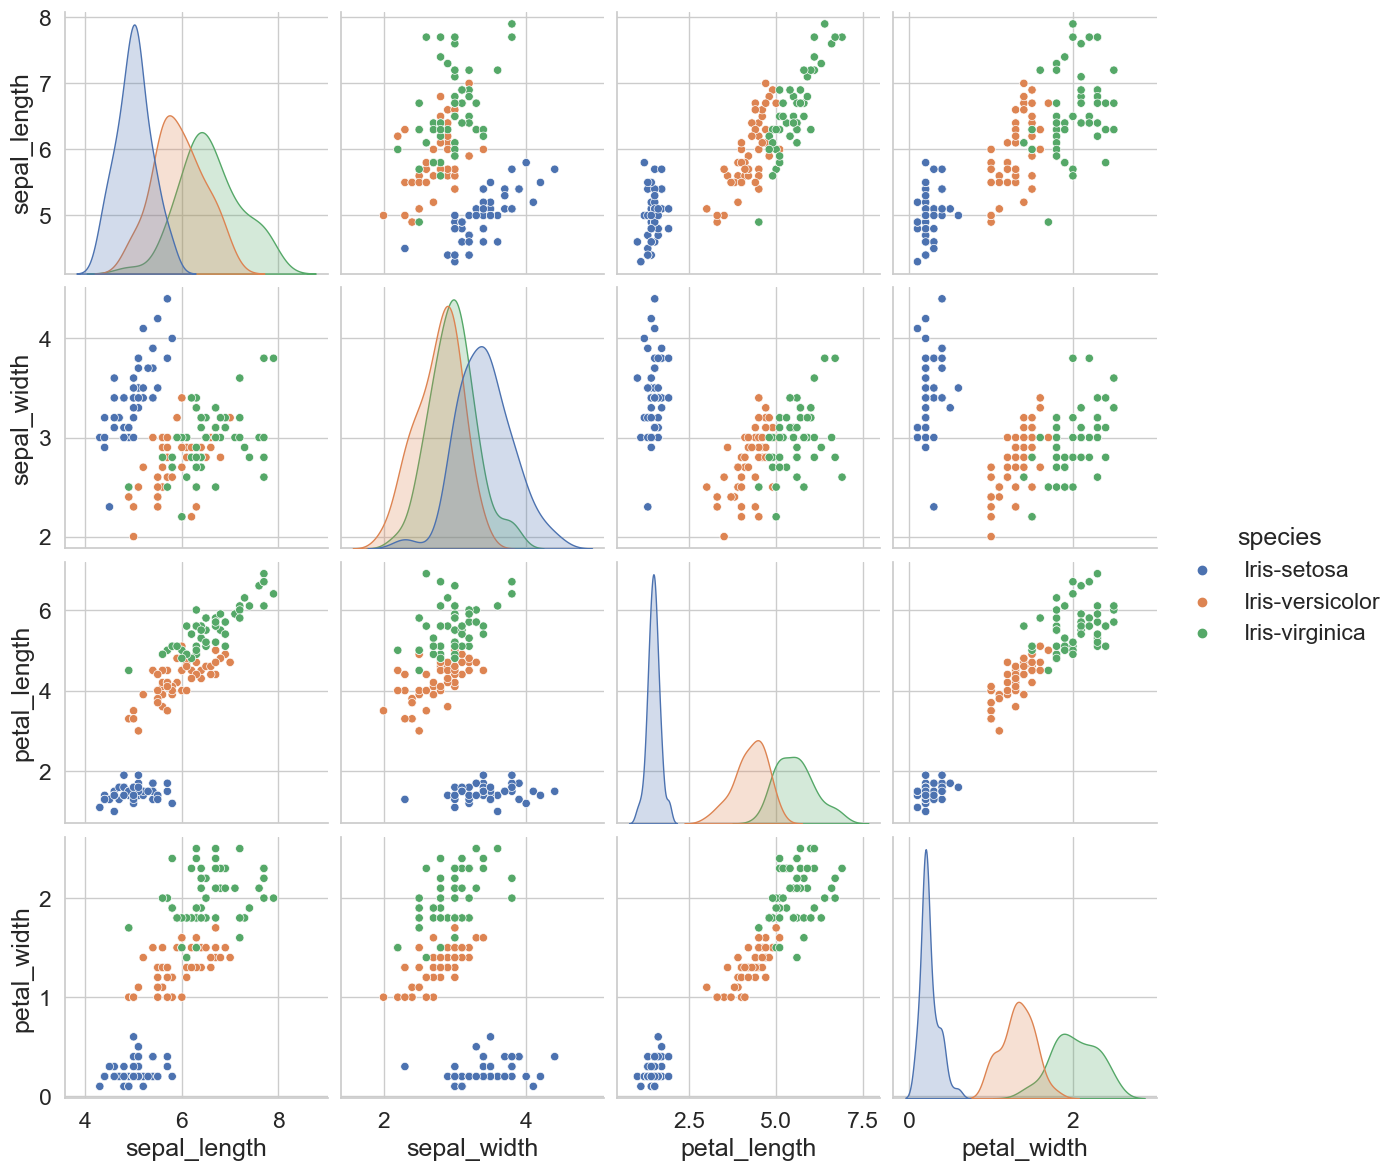

In [9]:
sns.set_style("whitegrid")
sns.pairplot(iris, hue="species",size=3);
plt.show()

## Models

### Preparing data

In [10]:
x = iris.iloc[:, [0,1,2,3]].values

species_map = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
y = iris['species'].map(species_map).values

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 0)

In [12]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((90, 4), (90,), (60, 4), (60,))

### Logistic Regression

In [13]:
# LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)

lr_pred = LR.predict(x_test)

In [14]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, lr_pred))

# Accuracy score
print('accuracy is',accuracy_score(lr_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.85      0.96      0.90        23
           2       0.94      0.81      0.87        21

    accuracy                           0.92        60
   macro avg       0.93      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60

accuracy is 0.9166666666666666


Text(104.44999999999997, 0.5, 'Actual outputs')

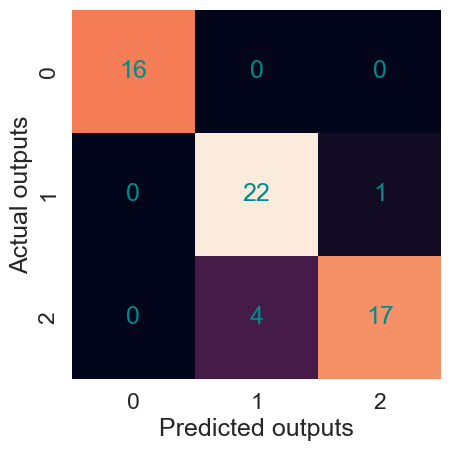

In [15]:
cm = confusion_matrix (y_test , lr_pred)
sns.heatmap(cm, annot=True, annot_kws={'color':'darkcyan'}, cbar=False, square=True)
plt.xlabel('Predicted outputs')
plt.ylabel('Actual outputs')

### K Nearest Neighbors

Check variations in accuracy with the number of neighbours.

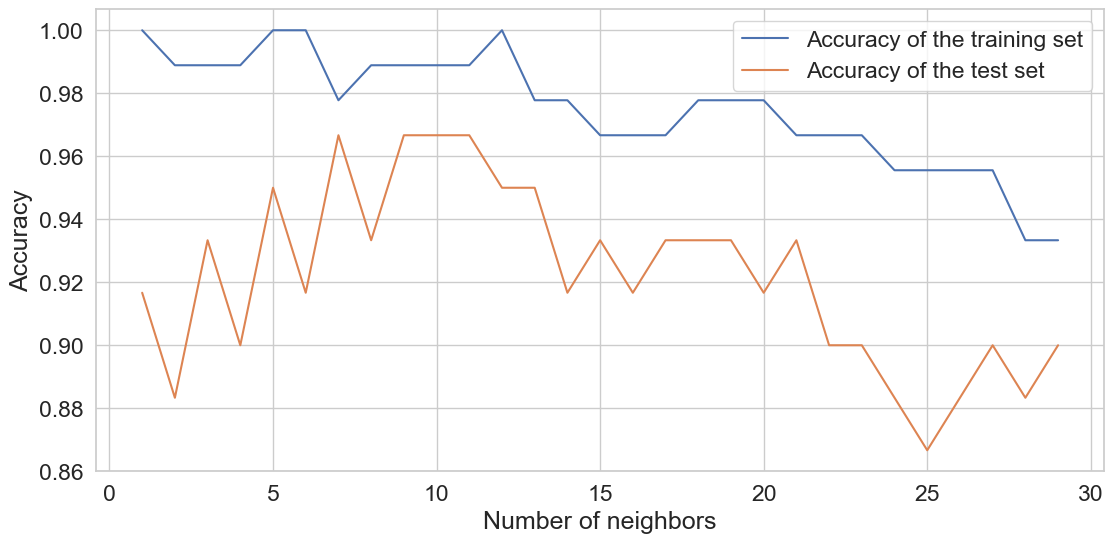

In [16]:
plt.figure(figsize=(13, 6))
training_acc = []
test_acc = []

neighbors_setting = range(1,30)

for n_neighbors in neighbors_setting:
    KNN = KNeighborsClassifier(n_neighbors = n_neighbors)
    KNN.fit(x_train , y_train.ravel())
    training_acc.append(KNN.score(x_train , y_train))
    test_acc.append(KNN.score(x_test , y_test))


plt.plot(neighbors_setting , training_acc , label = "Accuracy of the training set")
plt.plot(neighbors_setting , test_acc , label = "Accuracy of the test set")
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.grid(linestyle='-')
plt.legend()

The optimum training and testing accuracy is achieved at $n=10$

In [17]:
# Create the model with maximum accuracy
KNN = KNeighborsClassifier(10)
KNN.fit(x_train, y_train)
knn_pred = KNN.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test,knn_pred))

# Accuracy score
print('accuracy is',accuracy_score(knn_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.96      0.96      0.96        23
           2       0.95      0.95      0.95        21

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60

accuracy is 0.9666666666666667


Text(104.44999999999997, 0.5, 'Actual outputs')

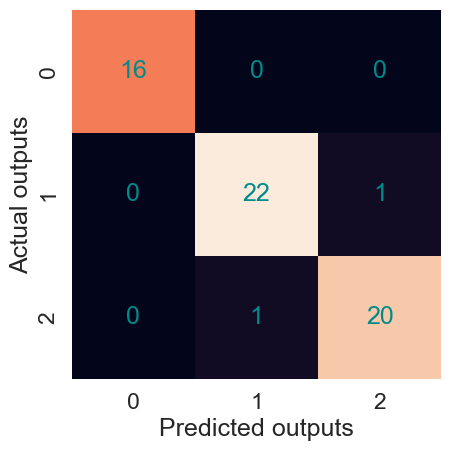

In [18]:
cm = confusion_matrix (y_test , knn_pred)
sns.heatmap(cm, annot=True, annot_kws={'color':'darkcyan'}, cbar=False, square=True)
plt.xlabel('Predicted outputs')
plt.ylabel('Actual outputs')

### Decesion Tree

In [19]:
DT = DecisionTreeClassifier(max_depth = 3)
DT = DT.fit(x_train , y_train)
dt_pred = DT.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test,dt_pred))
# Accuracy score
print('accuracy is',accuracy_score(lr_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      0.96      0.94        23
           2       0.95      0.90      0.93        21

    accuracy                           0.95        60
   macro avg       0.96      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60

accuracy is 0.9166666666666666


Text(104.44999999999997, 0.5, 'Actual outputs')

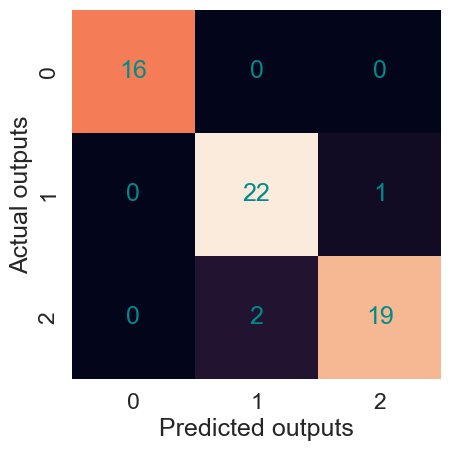

In [20]:
cm = confusion_matrix (y_test , dt_pred)
sns.heatmap(cm, annot=True,
            annot_kws={'color':'darkcyan'}, cbar=False, square=True)
plt.xlabel('Predicted outputs')
plt.ylabel('Actual outputs')

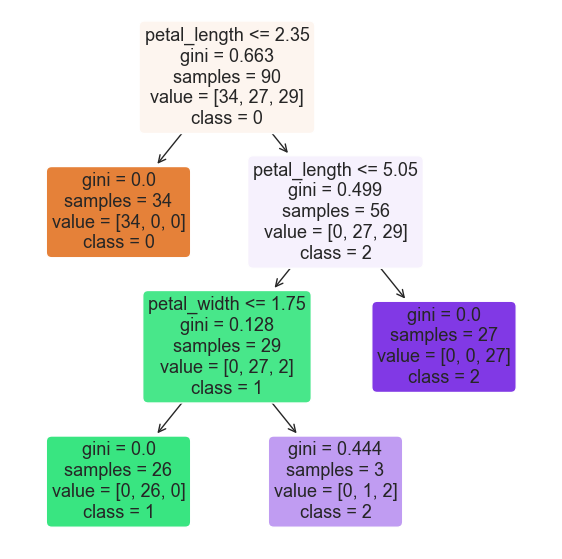

In [21]:
#white box one
F = ["sepal_length" , "sepal_width" , "petal_length" , "petal_width"]
T = ['0' , '1' , '2']
fig = plt.figure(figsize = (7, 7))
plot = tree.plot_tree (DT , feature_names = F , class_names = T , 
                       filled = True, fontsize = 13, rounded = True
                      ) 
plt.savefig('Decesion tree.jpg')

### K-Means
K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

__How to Implement K-Means Clustering?__

1. Choose the number of clusters k
2. Select k random points from the data as centroids
3. Assign all the points to the closest cluster centroid
4. Recompute the centroids of newly formed clusters
5. Repeat steps 3 and 4

In [22]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

### Using the elbow method to determine the optimal number of clusters for k-means clustering 

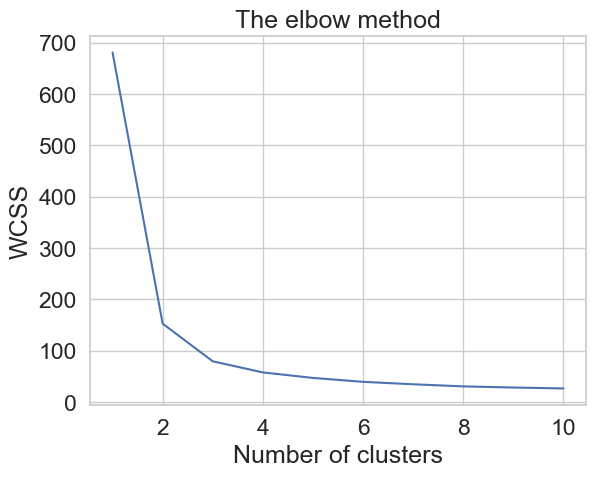

In [23]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

### Implementing K-Means Clustering

In [24]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', 
                max_iter = 300, n_init = 10, 
                random_state = 0
               )
y_kmeans = kmeans.fit_predict(x)

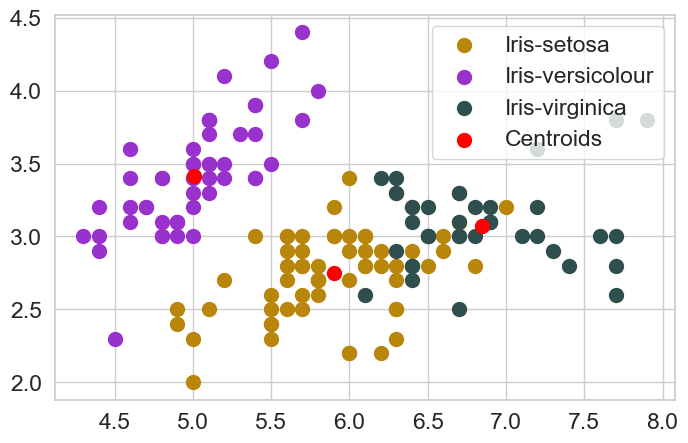

In [25]:
plt.figure(figsize=(8, 5))
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'darkgoldenrod', label = 'Iris-setosa')

plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'darkorchid', label = 'Iris-versicolour')

plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], 
            s = 100, c = 'darkslategray', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

The data-points look clustered but actually they are not when visualized on a 3D plot.

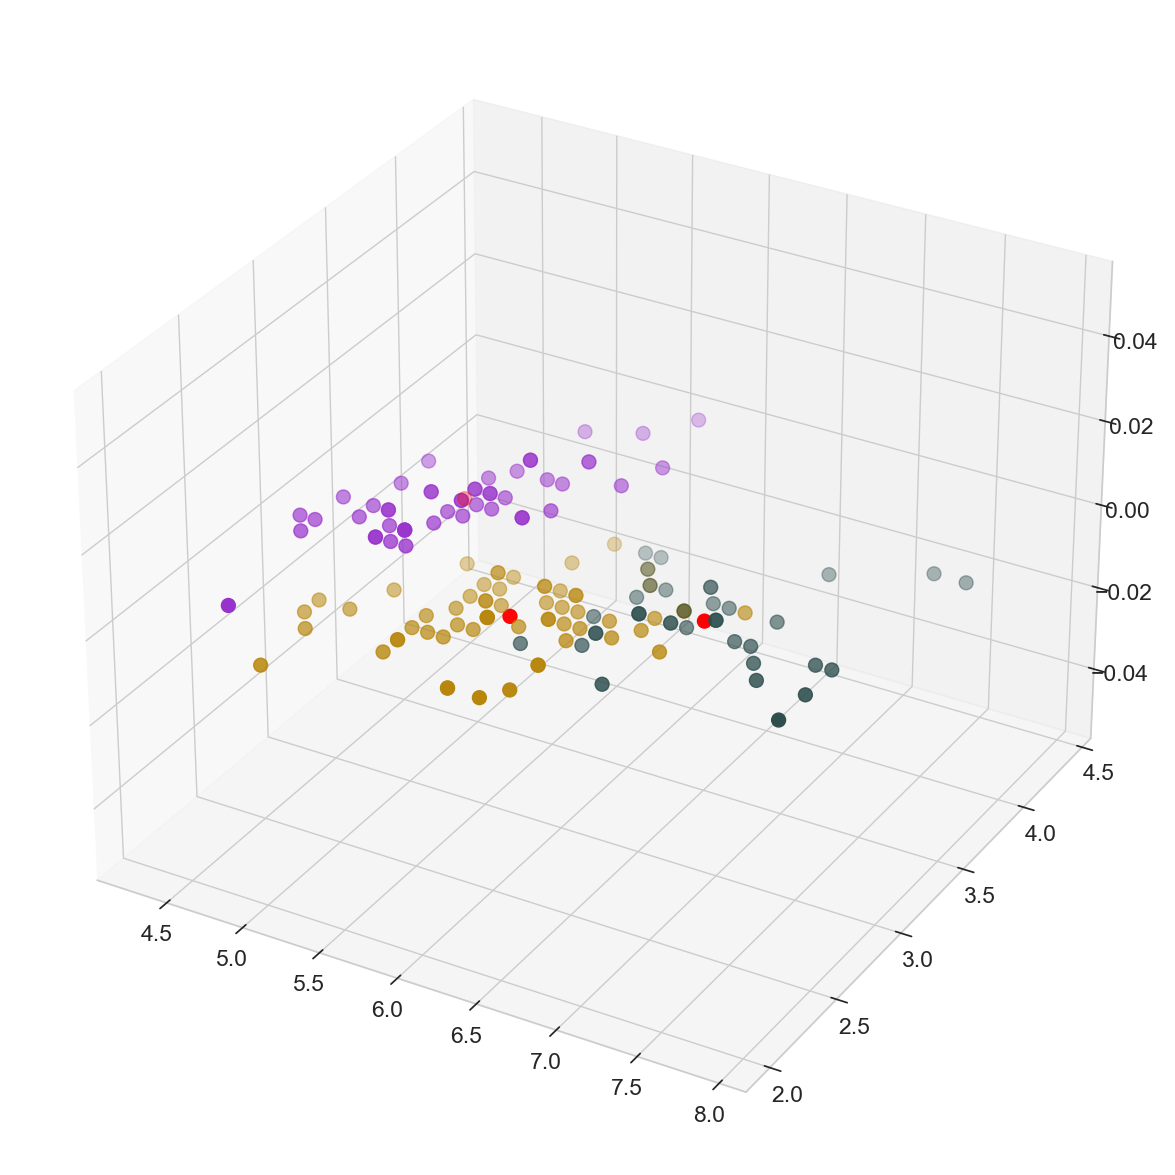

In [26]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'darkgoldenrod', label = 'Iris-setosa')

plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'darkorchid', label = 'Iris-versicolour')

plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], 
            s = 100, c = 'darkslategray', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')
plt.show()

> ## Thank You! ^_^